1. [Zero](#Zero-Fill)
1. [Average](#Average)
1. [Rolling Average](#Rolling-Average)
1. [Back Fill](#Back-Fill)
1. [Forward Fill](#Forward-Fill)
1. [Pad](#Pad-Interpolation)
1. [Linear](#Linear-Interpolation)
1. [Polynomial](#Polynomial-Interpolation)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("bmh")

In [2]:
df = pd.DataFrame(
{
    'period':range(2000, 2011),
    'col1': [296. ,  321,  369,  450, 499 , 577,  708,  923, 1209, 1294, 1492]
})

df['col2'] = df['col1'].copy()

df.set_index(['period'], inplace=True)
df

,col1,col2
period,,
2000,296.0,296.0
2001,321.0,321.0
2002,369.0,369.0
2003,450.0,450.0
2004,499.0,499.0
2005,577.0,577.0
2006,708.0,708.0
2007,923.0,923.0
2008,1209.0,1209.0


In [3]:
beg, end = 2005, 2007

### Zero Fill
---

In [4]:
df.loc[beg:end, ['col2']] = None
df['col3'] = df['col2'].fillna(0)
df.describe()

,col1,col2,col3
count,11.000000,8.000000,11.000000
mean,739.818182,741.250000,539.090909
std,424.968427,499.269109,542.557915
min,296.000000,296.000000,0.000000
25%,409.500000,357.000000,148.000000
50%,577.000000,474.500000,369.000000
75%,1066.000000,1230.250000,854.000000
max,1492.000000,1492.000000,1492.000000


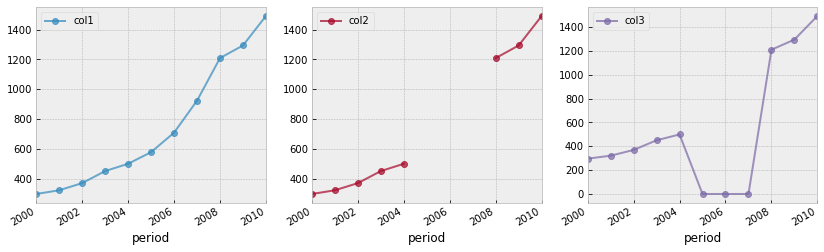

In [5]:
df.plot(alpha=.7, marker='o', subplots=True, layout=(1,len(df.columns)), figsize=(14,4));

In [6]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005    577.0
2006    708.0
2007    923.0
2008      0.0
2009      0.0
2010      0.0
dtype: float64

In [7]:
(df['col1'] - df['col3']).mad()

291.96694214876027

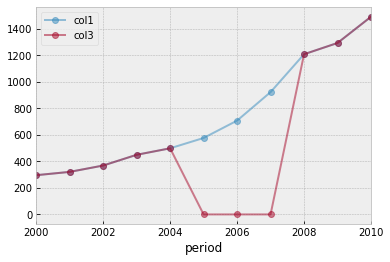

In [8]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Average
---

In [9]:
df.loc[beg:end, ['col2']] = None

avg = df['col2'].mean()
df['col3'] = df['col2'].fillna(avg)

df.describe()

,col1,col2,col3
count,11.000000,8.000000,11.000000
mean,739.818182,741.250000,741.250000
std,424.968427,499.269109,417.718506
min,296.000000,296.000000,296.000000
25%,409.500000,357.000000,409.500000
50%,577.000000,474.500000,741.250000
75%,1066.000000,1230.250000,975.125000
max,1492.000000,1492.000000,1492.000000


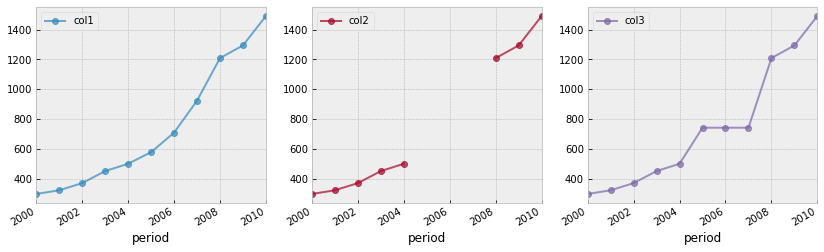

In [10]:
df.plot(alpha=.7, marker='o', subplots=True, layout=(1,len(df.columns)), figsize=(14,4));

In [11]:
(df['col1'] - df['col3'])

period
2000      0.00
2001      0.00
2002      0.00
2003      0.00
2004      0.00
2005   -164.25
2006    -33.25
2007    181.75
2008      0.00
2009      0.00
2010      0.00
dtype: float64

In [12]:
(df['col1'] - df['col3']).mad()

35.388429752066116

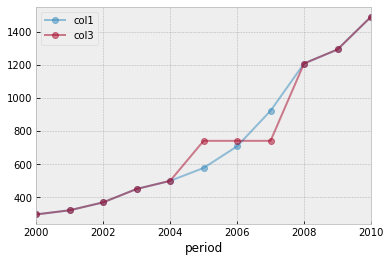

In [13]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Rolling Average
---

In [14]:
df.loc[beg:end, ['col2']] = None

rolling = df['col2'].rolling(window=6, min_periods=2).mean()

df['col3'] = df['col2'].fillna(rolling)

df.describe()

,col1,col2,col3
count,11.000000,8.000000,11.000000
mean,739.818182,741.250000,651.462121
std,424.968427,499.269109,445.280360
min,296.000000,296.000000,296.000000
25%,409.500000,357.000000,378.000000
50%,577.000000,474.500000,439.333333
75%,1066.000000,1230.250000,854.000000
max,1492.000000,1492.000000,1492.000000


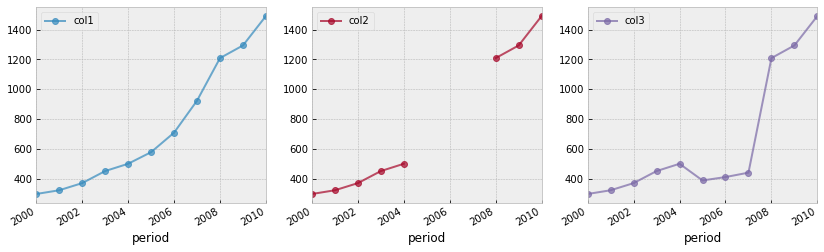

In [15]:
df.plot(alpha=.7, marker='o', subplots=True, layout=(1,len(df.columns)), figsize=(14,4));

In [16]:
(df['col1'] - df['col3'])

period
2000      0.000000
2001      0.000000
2002      0.000000
2003      0.000000
2004      0.000000
2005    190.000000
2006    298.250000
2007    483.666667
2008      0.000000
2009      0.000000
2010      0.000000
dtype: float64

In [17]:
(df['col1'] - df['col3']).mad()

128.51790633608815

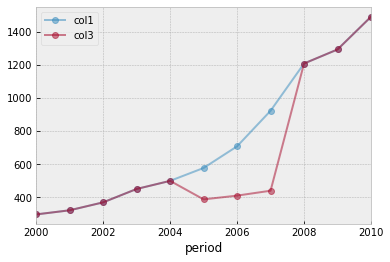

In [18]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Back Fill
---

In [19]:
df.loc[beg:end, ['col2']] = None

df['col3'] = df['col2'].fillna(method='bfill')

df.describe()

,col1,col2,col3
count,11.000000,8.000000,11.000000
mean,739.818182,741.250000,868.818182
std,424.968427,499.269109,471.407216
min,296.000000,296.000000,296.000000
25%,409.500000,357.000000,409.500000
50%,577.000000,474.500000,1209.000000
75%,1066.000000,1230.250000,1209.000000
max,1492.000000,1492.000000,1492.000000


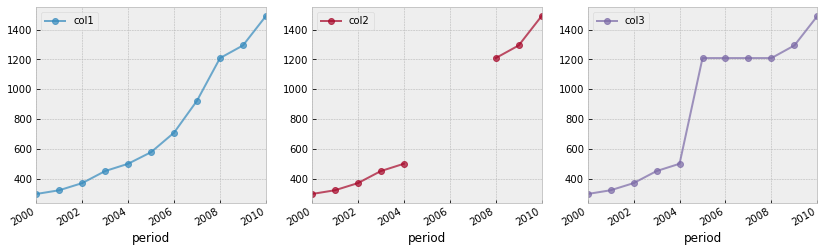

In [20]:
df.plot(alpha=.7, marker='o', subplots=True, layout=(1,len(df.columns)), figsize=(14, 4));

In [21]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005   -632.0
2006   -501.0
2007   -286.0
2008      0.0
2009      0.0
2010      0.0
dtype: float64

In [22]:
(df['col1'] - df['col3']).mad()

187.63636363636363

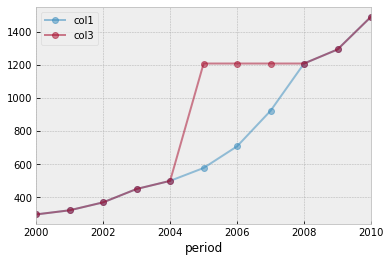

In [23]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Forward Fill
---

In [24]:
df.loc[beg:end, ['col2']] = None

df['col3'] = df['col2'].fillna(method='ffill')

df.describe()

,col1,col2,col3
count,11.000000,8.000000,11.000000
mean,739.818182,741.250000,675.181818
std,424.968427,499.269109,432.773340
min,296.000000,296.000000,296.000000
25%,409.500000,357.000000,409.500000
50%,577.000000,474.500000,499.000000
75%,1066.000000,1230.250000,854.000000
max,1492.000000,1492.000000,1492.000000


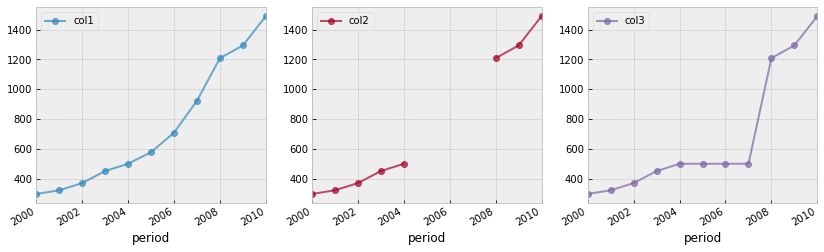

In [25]:
df.plot(alpha=.7, marker='o', subplots=True, layout=(1,len(df.columns)), figsize=(14, 4));

In [26]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005     78.0
2006    209.0
2007    424.0
2008      0.0
2009      0.0
2010      0.0
dtype: float64

In [27]:
(df['col1'] - df['col3']).mad()

94.01652892561984

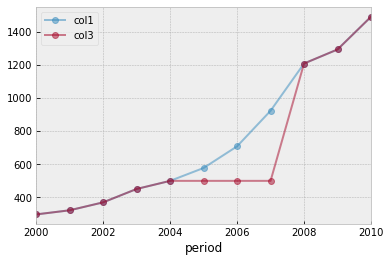

In [28]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Pad Interpolation
---

In [29]:
df.loc[beg:end, ['col2']] = None

df['col3'] = df['col2'].interpolate(method='pad')

df.describe()

,col1,col2,col3
count,11.000000,8.000000,11.000000
mean,739.818182,741.250000,675.181818
std,424.968427,499.269109,432.773340
min,296.000000,296.000000,296.000000
25%,409.500000,357.000000,409.500000
50%,577.000000,474.500000,499.000000
75%,1066.000000,1230.250000,854.000000
max,1492.000000,1492.000000,1492.000000


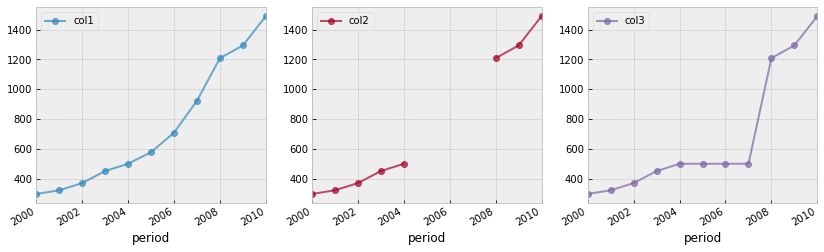

In [30]:
df.plot(alpha=.7, marker='o', subplots=True, layout=(1,len(df.columns)), figsize=(14, 4));

In [31]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005     78.0
2006    209.0
2007    424.0
2008      0.0
2009      0.0
2010      0.0
dtype: float64

In [32]:
(df['col1'] - df['col3']).mad()

94.01652892561984

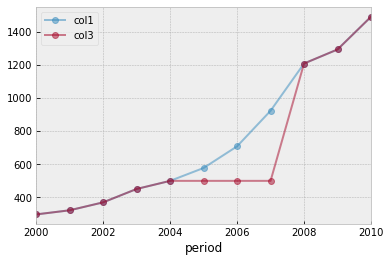

In [33]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Linear Interpolation
---

In [34]:
df.loc[beg:end, ['col2']] = None

df['col3'] = df['col2'].interpolate(method='linear')

df.describe()

,col1,col2,col3
count,11.000000,8.000000,11.000000
mean,739.818182,741.250000,772.000000
std,424.968427,499.269109,428.443287
min,296.000000,296.000000,296.000000
25%,409.500000,357.000000,409.500000
50%,577.000000,474.500000,676.500000
75%,1066.000000,1230.250000,1120.250000
max,1492.000000,1492.000000,1492.000000


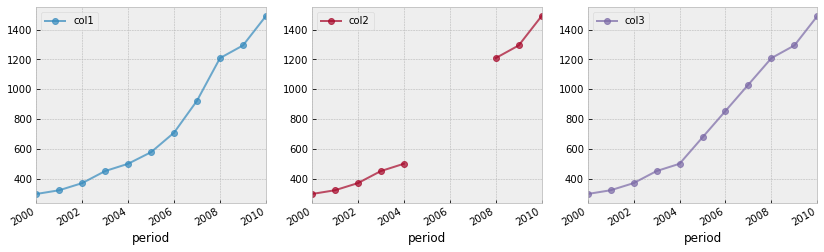

In [35]:
df.plot(alpha=.7, marker='o', subplots=True, layout=(1,len(df.columns)), figsize=(14, 4));

In [36]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005    -99.5
2006   -146.0
2007   -108.5
2008      0.0
2009      0.0
2010      0.0
dtype: float64

In [37]:
(df['col1'] - df['col3']).mad()

46.8099173553719

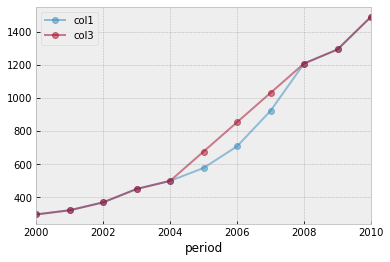

In [38]:
df[['col1','col3']].plot(alpha=.5, marker='o');

### Polynomial Interpolation
---

In [39]:
df.loc[beg:end, ['col2']] = None

df['col3'] = df['col2'].interpolate(method='polynomial', order=3)

df.describe()

,col1,col2,col3
count,11.000000,8.000000,11.000000
mean,739.818182,741.250000,768.721311
std,424.968427,499.269109,430.679474
min,296.000000,296.000000,296.000000
25%,409.500000,357.000000,409.500000
50%,577.000000,474.500000,633.639344
75%,1066.000000,1230.250000,1130.860656
max,1492.000000,1492.000000,1492.000000


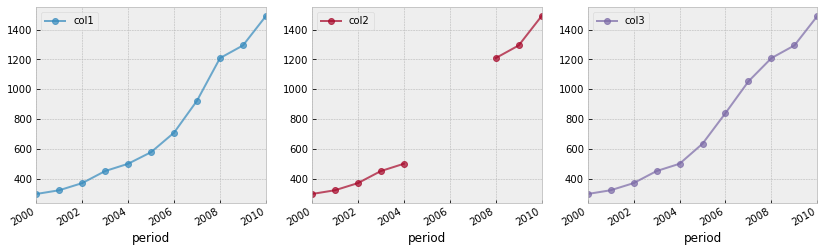

In [40]:
df.plot(alpha=.7, marker='o', subplots=True, layout=(1,len(df.columns)), figsize=(14, 4));

In [41]:
(df['col1'] - df['col3'])

period
2000      0.000000
2001      0.000000
2002      0.000000
2003      0.000000
2004      0.000000
2005    -56.639344
2006   -131.573770
2007   -129.721311
2008      0.000000
2009      0.000000
2010      0.000000
dtype: float64

In [42]:
(df['col1'] - df['col3']).mad()

42.04091586505897

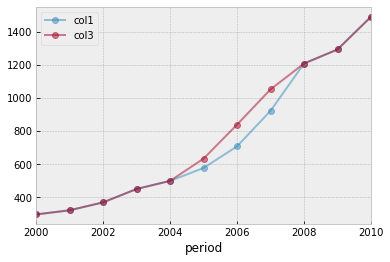

In [43]:
df[['col1','col3']].plot(alpha=.5, marker='o');